<a href="https://colab.research.google.com/github/AnnaLive2022/AnnaLive2022.github.io/blob/main/My_project_year1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Постановка задачи
## **Агентство недвижимости:**

К вам обратился представитель крупного агентства недвижимости со
следующей проблемой:
«Мои риелторы тратят катастрофически много времени на сортировку
объявлений и поиск выгодных предложений. Поэтому их скорость реакции, да
и, сказать по правде, качество анализа не дотягивают до уровня конкурентов.
Это сказывается на наших финансовых показателях.

Моя задача — разработать модель, которая позволила бы обойти
конкурентов по скорости и качеству совершения сделок. Вот датасет для
работы». 

Задача — разработать модель, которая позволила бы обойти
конкурентов по скорости и качеству совершения сделок. 

**Что необходимо сделать:** разработать сервис для предсказания стоимости
домов на основе истории предложений.

**Основные цели проекта:**

Произвести предобработку набора данных.
Провести разведывательный анализ данных и выявить основные закономерности.
Сформировать категории товаров и клиентов.
Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.

## 2. Знакомство с данными, базовый анализ

In [572]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from scipy import stats

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error




In [760]:
# подключаем google диск, где у нас хранятся данные
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [574]:
# прочитать файл
dst_data = pd.read_csv('/content/drive/MyDrive/data/data.csv')


In [575]:
dst_data.columns

Index(['status', 'private pool', 'propertyType', 'street', 'baths',
       'homeFacts', 'fireplace', 'city', 'schools', 'sqft', 'zipcode', 'beds',
       'state', 'stories', 'mls-id', 'PrivatePool', 'MlsId', 'target'],
      dtype='object')

Итак, у нас есть данные о более чем 377 тысяч предложений продажи недвижимости. Каждая из них описывается следующими признаками:

* 'status'	    - статус; 
* 'private pool'	- частный бассейн;
* 'propertyType'	- тип недвижимости;
* 'street'	    - улица; 
* 'baths'         - бани;   
* 'homeFacts'	- сведения о доме;
* 'fireplace'	- камин;
* 'city'		- город;
* 'schools'	- школы;
* 'sqft'		- квадратный фут;
* 'zipcode'	- почтовый индекс;
* 'beds'		- спальнит;
* 'state'		- штаты;
* 'stories'	- тажность; 
* 'mls-id'	- млс-идентификатор;
* 'PrivatePool'	- частный бассейн;
* 'MlsId'		- MlsId идентификатор;

Целевой признак:
* 'target'	- цель (цена недвижиости)




In [576]:
dst_data.head(3)

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"


In [577]:
dst_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103115 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226470 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

Набор данных состоит и 377185 строк и 18 столбцов. Все типа  object.  Данные имеют много пропусков. 

In [578]:
# Посмотрим на статистические характеристики некоторых признаков

display(dst_data.describe())


,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,337267,4181,342452,377183,270847,377185,103115,377151,377185,336608,377185,285903,377185,226470,24942,40311,310305,374704
unique,159,1,1280,337076,229,321009,1653,2026,297365,25405,4549,1184,39,348,24907,2,232944,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No MLS#,yes,NO MLS,"$225,000"
freq,156104,4181,92206,672,52466,7174,50356,24442,4204,11854,2141,53459,115449,67454,3,28793,24,1462


В датасете много нетипичных данных. Несогласованных данных.

Есть два одинаковых столбца PrivatePool и private pool, которые нужно объеденить.

## 3. Предобработка и очистка данных


Исследуем сформированный набор данных;
Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении стоимости недвижимости;
Дополним наш анализ визуализациями, иллюстрирующими исследование. 

### Проанализируем датасет на наличие дублирующих записей

In [579]:
mask = dst_data.duplicated(subset=dst_data.columns) # маска для фильтрации
data_duplicates = dst_data[mask] # фильтруем наш датасет
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')

Число найденных дубликатов: 50


In [580]:
dst_data[dst_data.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 25418 to 371886
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status        49 non-null     object
 1   private pool  0 non-null      object
 2   propertyType  50 non-null     object
 3   street        50 non-null     object
 4   baths         20 non-null     object
 5   homeFacts     50 non-null     object
 6   fireplace     3 non-null      object
 7   city          50 non-null     object
 8   schools       50 non-null     object
 9   sqft          23 non-null     object
 10  zipcode       50 non-null     object
 11  beds          22 non-null     object
 12  state         50 non-null     object
 13  stories       8 non-null      object
 14  mls-id        0 non-null      object
 15  PrivatePool   1 non-null      object
 16  MlsId         39 non-null     object
 17  target        49 non-null     object
dtypes: object(18)
memory usage: 7.4+ KB


In [581]:
df = dst_data.copy() # Делаем копию
df = df.drop_duplicates() # Удаляем дубликаты

### Посмотрим пропущенные значения. 


In [582]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

status - 11%
private pool - 99%
propertyType - 9%
street - 0%
baths - 28%
homeFacts - 0%
fireplace - 73%
city - 0%
schools - 0%
sqft - 11%
zipcode - 0%
beds - 24%
state - 0%
stories - 40%
mls-id - 93%
PrivatePool - 89%
MlsId - 18%
target - 1%


<AxesSubplot:>

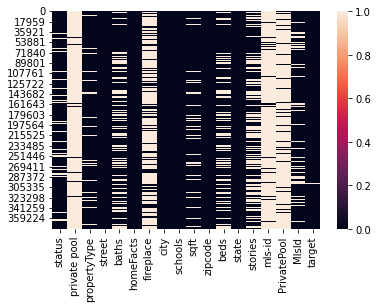

In [583]:
sns.heatmap(df.isnull()) # наглядная карта пропусков

Воспользуемся правилом:

Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных.

Признаки 'private pool' и 'PrivatePool' не удаляем, т.к. мы их будем объединять.

Признаки 'mls-id' и ''fireplace'  имеют больше 90% пропусков, удалим их.


In [584]:
df = df.drop(['mls-id', 'fireplace'], axis=1) 


### Преобразуем признак 'target

Преобразуем признак 'target', чтобы он корректно считывался, как вещественное число (float)**

In [585]:
# Удалим строки с  пустыми значениями признака 'target'
df.drop(df[df.target.isna()].index, inplace=True)
df = df.reset_index(drop=True)

In [586]:
def make_target(x):
    x = re.sub('[^0-9]', '', x)
    x = int(x)
    return x

df.target = df.target.apply(make_target)

In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374655 entries, 0 to 374654
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        335399 non-null  object
 1   private pool  4151 non-null    object
 2   propertyType  340101 non-null  object
 3   street        374653 non-null  object
 4   baths         269308 non-null  object
 5   homeFacts     374655 non-null  object
 6   city          374621 non-null  object
 7   schools       374655 non-null  object
 8   sqft          334560 non-null  object
 9   zipcode       374655 non-null  object
 10  beds          283726 non-null  object
 11  state         374655 non-null  object
 12  stories       224902 non-null  object
 13  PrivatePool   40120 non-null   object
 14  MlsId         310187 non-null  object
 15  target        374655 non-null  int64 
dtypes: int64(1), object(15)
memory usage: 45.7+ MB


In [588]:
df['target'].value_counts()

225000    1806
275000    1650
250000    1644
350000    1641
325000    1562
          ... 
236070       1
752911       1
73360        1
455740       1
171306       1
Name: target, Length: 34232, dtype: int64

In [589]:
df['target'] = df['target'].astype(float)

### Преобразуем признак "propertyType"

ипы домов, жилищ, и их основные характеристики:

Apartment - Квартира
Condo - Квартира (Кондоминиум)
Co-Op - Совместная (Кооперативная квартира)
Single-Family (Detached)
Tiny Home - Односемейный (маленький, отдельный)
Townhome, Townhouse
Cape Cod - черепица, деревянный сайдинг, центральная дверь с окнами по бокам, 1-2 этажf.
Colonial home - Два этажа с лишним, симметричный, центральная лестница, формальный вид. Different types include English, French, Dutch, Georgian, Spanish and American (which closely resembles English) colonials.
Contemporary - Основные характеристики: Чистые, простые линии; нейтральные цвета; натуральные текстуры
Cottage - Уютная, небольшая веранда; небольшие жилые помещения; индивидуальный характер.
Craftsman - "ремесленник" элементы ручной работы из дерева, выступающие балки, большие колонны.
Greek Revival - большие белые колонны, украшения в греческом стиле, парадный вход.
Farmhouse -
деревенское, прямоугольное, большое крыльцо, крыши в стиле сарая и особенности.
French Country - влияние прованса, каменный внешний вид, состаренный вид.
Mediterranean - белая штукатурка, теплое дерево и камень, черепичные крыши, есть элементы испанских и итальянских вилл.
Midcentury Modern - сочетание органики и геометрии, гладкий, лаконичный, большие окна.
Ranch - один этаж, низкая крыша, открытые жилые помещения, задний двор.
Split-Level - Жилые помещения разделены короткими лестничными пролетами.
Tudor - Деревянный каркас, каменная кладка, ассимметричные, крутые двускатные крыши.
Victorian (Queen Anne Houses) - два-три этажа, богато украшенные крутые двускатные крыши, небольшие башни, яркие фасады.

In [590]:
df['propertyType'].isna().sum()

34554

In [591]:
# заменим пустые значения и пропущенные на 'unknown'
df['propertyType'] = df['propertyType'].fillna('unknown')
df['propertyType'] = df['propertyType'].apply(lambda x: 'unknown' if x ==' ' else x)
# переведем все в нижний регистр
df['propertyType'] = df['propertyType'].apply(lambda x: x.lower())

In [592]:
df['propertyType'].value_counts().index.tolist()

['single-family home',
 'single family',
 'condo',
 'unknown',
 'single family home',
 'lot/land',
 'townhouse',
 'land',
 'multi-family',
 'condo/townhome/row home/co-op',
 'traditional',
 'coop',
 'multi family',
 'high rise',
 'ranch',
 'detached, one story',
 'mobile/manufactured',
 'single detached, traditional',
 'contemporary',
 'multi-family home',
 '1 story',
 'colonial',
 'mobile / manufactured',
 'contemporary/modern',
 '2 stories',
 'apartment',
 'mfd/mobile home',
 'single detached',
 'detached, two story',
 'one story',
 'transitional',
 'cooperative',
 'florida',
 'bungalow',
 'farms/ranches',
 'two story',
 'garden home',
 'cape cod',
 '2 story',
 '2 stories, traditional',
 'spanish/mediterranean',
 'other style',
 '1 story, traditional',
 'other',
 'condo/townhome, traditional',
 'craftsman',
 'contemporary/modern, traditional',
 'condo/townhome',
 'condo/townhome, contemporary/modern',
 'singlefamilyresidence',
 'single detached, contemporary/modern',
 'multiple occup

In [593]:
df['propertyType'] = df['propertyType'].apply(lambda x: x.replace('lot/land', 'land'))

In [594]:
df['propertyType'].value_counts()['land']

31439

In [595]:
# Заменим 'lot/land' на 'land'
df['propertyType'] = df['propertyType'].apply(lambda x: x.replace('lot/land', 'land'))
df['propertyType'] = df['propertyType'].apply(lambda x: 'land' if (-1 != x.find('land')) else x)

In [596]:
# Находим индексы  строк с земельными участками.
ind_land = df[df['propertyType']=='land'].index
ind_land


Int64Index([     4,     41,     49,     50,     61,     69,    103,    124,
               140,    173,
            ...
            374550, 374555, 374569, 374572, 374592, 374594, 374598, 374605,
            374610, 374631],
           dtype='int64', length=31451)

In [597]:
# Удаляем земельные участки, т.к. они нам не нужны
df.drop(ind_land, inplace=True)
# сбрасываем индекс
df = df.reset_index(drop=True)

In [598]:
# заменяем некоторые значения чтобы привести признак к более однородному виду
old = ['one', 'two', '2-', 'stories', '1 1/2', 'tri-', 'single family',
       'singlefamilyresidence', 'townhome',   'bi', 'bi-', 'multi family', 
       'hi-', 'high ', 'condominium',  '4 plex', 'other', 'ca2 n', 'cape cod',
       'mid century', 'mid-century',  'mo2 le', 'mo2le', ' / ','mfd',   
       'co-op', 'coop',  'modernist', 'key west', 'farm house',
       'queen anne', ' -level', 'floors', 'mobile home', 'manuf/mobile',
       'less than 4 story', 'historic/older', 'quad']
new = ['1', '2', '2 ', 'story',  '1.5', '3 ', 'single-family',
       'single-family', 'townhouse',  '2 ', '2 ',  'multi-family',
       'high-', 'high-', 'condo',  '4-plex', 'other style', 'cabin', 'cape', 
       'midcentury', 'midcentury', 'mobile', 'mobile', '/', 'manufactured', 
        'cooperative', 'cooperative',  'modern', 'elevated', 'farmhouse',
        'victorian', ' level',  'story', 'manufactured', 'manufactured',
        '3 story', 'historical', '4']
for i in range(0,len(new)):
    df['propertyType'] = df['propertyType'].apply(lambda x: 
                                                  x.replace(old[i], new[i]))

In [599]:
# Выделим признак этажность в отдельное поле
df['Story_type'] = df['propertyType'].apply(lambda x: 
                                        x if -1!= x.find('story') else 'no')

In [600]:
# Dыделим индексы строк, имеющие данные об этажности
ind_story = df[df['Story_type']!='no'].index
ind_story

Int64Index([    14,     90,    106,    154,    166,    181,    198,    277,
               342,    469,
            ...
            342645, 342653, 342720, 342724, 342828, 342830, 342922, 342982,
            343108, 343112],
           dtype='int64', length=7712)

In [601]:
# df['stories'][ind_story].value_counts()

In [602]:
df['Story_type'][ind_story].value_counts()

1 story                                                    1827
detached, 1 story                                          1614
2 story                                                    1506
detached, 2 story                                           638
2 story, traditional                                        289
                                                           ... 
1 story, spanish, ranch, traditional                          1
2 story, traditional, mediterranean, texas hill country       1
contemporary/modern, ranch, 1 story                           1
3 story, 4+ story, art deco, multi-level                      1
3+ story, contemporary, traditional                           1
Name: Story_type, Length: 226, dtype: int64

In [603]:
df['Story_type'][ind_story].value_counts().index.tolist()

['1 story',
 'detached, 1 story',
 '2 story',
 'detached, 2 story',
 '2 story, traditional',
 '1 story, traditional',
 '2 story, contemporary',
 '1 story, contemporary',
 'low-rise (1-3 story)',
 'ranch, 1 story',
 'detached, ranch, 1 story',
 'detached, 2 story, spanish/mediterranean',
 '1 story with basement',
 'detached, 1 story, spanish/mediterranean',
 '1 story, ranch',
 'high-rise (8+ story)',
 '1 story, historical',
 '2 story with basement',
 '2 story, mediterranean',
 '1 story, spanish/mediterranean',
 '3 story',
 '2 story, spanish/mediterranean',
 'manufactured house, ranch, 1 story',
 '2 story, historical',
 '2 story, contemporary, traditional',
 '1 story, ranch, traditional',
 'mid-rise (4-7 story)',
 '2 story, texas hill country',
 '2 story, craftsman',
 '3+ story',
 '1 story with basement, craftsman',
 'detached, patio home, 2 story',
 'manufactured house, ranch, 1 story, manufactured home',
 '1 story, mediterranean',
 '3+ story, contemporary',
 '1 story, texas hill countr

In [604]:
# Оставляем сведения только относящиеся к этажности и записываем в признак 'stories'
def story(x):
    s = x.split(',')
    se = ''
    for i in range(0, len(s)):
        if s[i].find('story')!=-1:
            se = s[i]
    return se.strip()

df.loc[ind_story, 'stories'] = df['Story_type'][ind_story].apply(story)
df['stories'][ind_story].value_counts()

1 story                    4332
2 story                    2919
1 story with basement        99
low-rise (1-3 story)         90
2 story with basement        68
3 story                      44
3+ story                     44
high-rise (8+ story)         38
1.5 story with basement      21
4+ story                     17
mid-rise (4-7 story)         15
1.5 story                    13
1 story/ranch                 7
manufactured 1 story          1
coastal 2 story               1
2.5 story                     1
2 story condo                 1
1 story traditional           1
Name: stories, dtype: int64

In [605]:
# Очищаем от слов, относящихся к типам домов и записываем в признак 'stories'
del_str = ['/ranch', 'manufactured', 'coastal', 'traditional', 'condo']

def del_substr(x):
    for i in range(0, len(del_str)):
        x = x.replace(del_str[i], '').strip()
    return x

df.loc[ind_story, 'stories'] = df['stories'][ind_story].apply(del_substr)
df['stories'][ind_story].value_counts()

1 story                    4341
2 story                    2921
1 story with basement        99
low-rise (1-3 story)         90
2 story with basement        68
3 story                      44
3+ story                     44
high-rise (8+ story)         38
1.5 story with basement      21
4+ story                     17
mid-rise (4-7 story)         15
1.5 story                    13
2.5 story                     1
Name: stories, dtype: int64

In [606]:
# Удаляем сведения, относящихся к этажности для перезаписи в признак 'propertyType'
def type_del_story(x):
    s = x.split(',')
    for i in range(0, len(s)):
        if s[i].find('story')!=-1:
            if len(s)==1 and i==0:
                s[i] = 'other'
            if len(s)>1:
                s[i] = ','
            if len(s)>1 and i==0:
                s[i]=''
        x = '' .join(s).strip()
    return x

In [607]:
df.loc[ind_story, 'propertyType'] = df['Story_type'][ind_story].apply(type_del_story)

df['propertyType'][ind_story].value_counts()

other                                       3641
detached,                                   2252
traditional                                  540
contemporary                                 266
detached, spanish/mediterranean              120
                                            ... 
texas hill country a-frame                     1
colonial contemporary                          1
split level contemporary traditional           1
contemporary ranch traditional craftsman       1
multi-level patio home townhouse               1
Name: propertyType, Length: 127, dtype: int64

In [608]:
df.drop('Story_type', axis=1, inplace=True)

In [609]:
# Присвоение полям новых названий в соответствии с найденной подстрокой
new = ['mediterranean', 'english', 'georgian', 'florida','spanish',
        'lake house', 'tudor', 'victorian', 'ranch', 'townhouse', 
        'single-family','multi-family', 'single detached', 'detached', 
        'high-rise', 'colonial', 'traditional',
        'condo', 'contemporary', 'other style', 'bungalow', 'craftsman',
        'cape cod','cooperative', 'a-frame',  'custom', 'loft', 
        'multi-level', 'attached', 'manufactured',  'side-by-side', 
        'cottage',  'french', 'cluster home', 'garden home', 
        'farmhouse', 'elevated',  'historical', 'transitional','penthouse',
        'modern']

for i in range(0, len(new)):
    df['propertyType'] = df['propertyType'].apply(lambda x: new[i] 
                                            if (-1 != x.find(new[i])) else x)

In [610]:
df['propertyType'].value_counts()

single-family           185160
condo                    42772
unknown                  34708
townhouse                27006
multi-family             12169
                         ...  
2 level, cape                1
split level, 3 level         1
historic vintage             1
mid rise                     1
prairie                      1
Name: propertyType, Length: 152, dtype: int64

In [611]:
#  Присвоение  полям новых значений с изменением
old = ['cape','log']
new = ['cape cod','log home']

for i in range(0,len(new)):
    df['propertyType'] = df['propertyType'].apply(lambda x: new[i] 
                                              if -1!=x.find(old[i])  else x)
df['propertyType'] = df['propertyType'].apply(lambda x: 'historical'
                        if (x=='historic') or (x=='historic vintage') else x)

In [612]:
df['propertyType'].value_counts()

single-family      185160
condo               42772
unknown             34708
townhouse           27006
multi-family        12169
                    ...  
bermuda                 1
back-to-back            1
split,                  1
resort property         1
prairie                 1
Name: propertyType, Length: 144, dtype: int64

In [613]:
df['propertyType'] = df['propertyType'].apply(lambda x: 'other style' 
                            if (x=='no data') or (x=='other')  else x)

In [614]:
# Уменьшим число категорий, выберем топ 50  типов стилей домов.
top_Type = df['propertyType'].value_counts()[:50].index
df['propertyType'] = df['propertyType'].apply(lambda x: x 
                                            if x in top_Type else 'other style')

In [615]:
df['propertyType'].value_counts()

single-family            185160
condo                     42772
unknown                   34708
townhouse                 27006
multi-family              12169
traditional                7171
detached                   5305
other style                4916
cooperative                3834
manufactured               3500
contemporary               3226
ranch                      3104
high-rise                  1969
colonial                   1342
mediterranean               875
apartment                   797
florida                     749
transitional                569
bungalow                    551
garden home                 321
cape cod                    313
craftsman                   308
tudor                       156
cluster home                155
custom                      146
multiple occupancy          145
victorian                   140
spanish                     129
modern                      119
split-level                 119
federal                     115
elevated

In [616]:
df.head(3)

,status,private pool,propertyType,street,baths,homeFacts,city,schools,sqft,zipcode,beds,state,stories,PrivatePool,MlsId,target
0,Active,NaN,single-family,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,611019,418000.0
1,for sale,NaN,single-family,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,201916904,310000.0
2,for sale,NaN,single-family,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,yes,FR19221027,2895000.0


In [617]:
# # кодируем штат с помощью  метода LabelEncode
# from sklearn import preprocessing
# from sklearn.preprocessing import LabelEncoder
# df['propertyType'] = LabelEncoder().fit_transform(df['propertyType'])
# df.head(3)

### Преобразуем признак "stories"

Признаки 'stories' и 'propertyType' необходимо рассмотреь совместно, так как в признаке 'propertyType' приведены данные об этажности домов, которые относятся к признаку 'stories'.

In [618]:
df['stories'].value_counts()

1.0                           65508
2.0                           54556
1                             22748
2                             17940
3.0                           11113
                              ...  
Tudor                             1
Multi Level, Three or More        1
A Frame                           1
Quad Level                        1
65.0                              1
Name: stories, Length: 356, dtype: int64

In [619]:
# найдем количество пропусков
df['stories'].isna().sum()

113202

In [620]:
df['stories'] = df['stories'].fillna('0.0')
df['stories'] = df['stories'].apply(lambda x: x.lower())
df['stories'] = df['stories'].apply(lambda x: '0.0' if x == '0' else x)

In [621]:
# заменяем некоторые значения чтобы привести признак к более однородному виду
num_str = ['one','two','bi', 'split', 'three','tri','four', 'quad' , 'stories', 
           '-level', 'levels', 'leveland','cape cod', '1 and 1 half', '1 1/2 story',
           'ranch', 'garden', 'log home', 'cape',
          'raised ranch', 'bungalow', 'farm house', '4plex', 'sixplex','tudor']
num_num = ['1','2','2', '2', '3','3', '4', '4', 'story', 
           ' level', 'level', 'level and','1 story', '1.5 story', '1.5 story',
           '1 story', '1 story', '1 story', '1 story',
          '1 story', '1 story', '1 story', '4 plex','6 plex', '2 story']
for i in range(0, len(num_str)):
    df['stories'] = df['stories'].apply(lambda x: x.replace(num_str[i], num_num[i]))

In [622]:
df['stories'].value_counts()

0.0                                  124642
1.0                                   65508
2.0                                   54556
1                                     28506
2                                     20435
                                      ...  
manufactured home, non-site built         1
bedroom - 2 plan                          1
78                                        1
n1                                        1
65.0                                      1
Name: stories, Length: 323, dtype: int64

In [623]:
one_story = ['condominium', 'traditional', 'contemporary', 
             'mo2le', 'ground level', 'modular home', 'craftsman']
def change_story(x):
    if x=='townhouse':
        x = '2'
    if x in one_story:
        x = '1'
    if -1!=x.find('low-rise') or -1!=x.find('multi level'):
        x = '2'
    if -1!=x.find('mid-rise'):
        x = '5'
    if -1!=x.find('high-rise'):
        x = '9'
    return x

df['stories'] = df['stories'].apply(change_story)  

In [624]:
df['stories'].value_counts().index.tolist()

['0.0',
 '1.0',
 '2.0',
 '1',
 '2',
 '3.0',
 '1 story',
 '2 story',
 '3',
 '9.0',
 '2.00',
 '4.0',
 '1.00',
 '4',
 '3+',
 '6.0',
 '1.50',
 '5.0',
 '3 or more',
 '9',
 '3.00',
 '1 story/1 story',
 '7.0',
 '1 level',
 '6',
 '5',
 '3 story',
 '8.0',
 '2 story or more',
 'multi/2',
 '2 level',
 '1.5',
 '1.5 story',
 '2.0000',
 '2 level, site built',
 '1 level, site built',
 '2 story/basement',
 'story/level',
 '1.0000',
 '1 story with basement',
 '12.0',
 '2.50',
 '7',
 '16.0',
 '1.5 level, site built',
 '1 story basement',
 '3 level',
 '8',
 '2 story with basement',
 '11.0',
 '17.0',
 '2 or more story',
 '2.5',
 '15.0',
 '20.0',
 '12',
 '10.0',
 '13.0',
 '14.0',
 '3+ story',
 '1.5000',
 '20',
 '4.00',
 '4 story',
 '11',
 '18.0',
 '14',
 '21.0',
 '19.0',
 '2.5 story',
 '16',
 '1.5 story/basement',
 '3 level, site built',
 '21',
 '19',
 '1.5 level',
 '13',
 '24.0',
 '25.0',
 '23.0',
 '1.75',
 '15',
 '3 or more level',
 '23',
 '22.0',
 '17',
 '1.000',
 '27.0',
 'total floors in bldg',
 '30.0

In [625]:
def stories_float(x):
    if x.startswith(','): x = x[1:]
    if x == -1.0: return x
    x = re.sub('[^0-9,-\.]', '', x)
    x = re.sub('-',',', x)
    x = x.replace(',,',',0,')
    x = x.split(',')
    try:
        x = (max([float(item) for item in x]))
        # x = float(x)
        if x>120.0 or x==0.0:
            x=1.0
    except:
        x = 1.0
    return x

df['stories'] = df['stories'].apply(stories_float)

In [626]:
df['stories'].value_counts()

1.0     227790
2.0      84708
3.0      17721
9.0       3450
4.0       3143
         ...  
82.0         1
1.2          1
2.2          1
96.0         1
65.0         1
Name: stories, Length: 83, dtype: int64

### Преобразуем признак 'private pool'

Посмотрим на значения двух признаков с одинаковым наименованием, затем объеденим их.

In [627]:
df['private pool'].value_counts()

Yes    4151
Name: private pool, dtype: int64

In [628]:
df['PrivatePool'].value_counts()

yes    28358
Yes    11434
Name: PrivatePool, dtype: int64

In [629]:
df['private pool'] = df['private pool'].apply(lambda x: 1 if x=='Yes' else 0)
df['PrivatePool'] = df['PrivatePool'].apply(lambda x: 1 if (x=='Yes' or x=='yes') else 0)

In [630]:
df['PrivatePool'].value_counts()

0    303412
1     39792
Name: PrivatePool, dtype: int64

In [631]:
# Объединим два признака:
df['PrivatePool'] = df['private pool'] | df['PrivatePool']
df.drop(['private pool'], axis=1, inplace=True)

In [632]:
df['PrivatePool'].value_counts()

0    299261
1     43943
Name: PrivatePool, dtype: int64

### Преобразуем признак "state"

In [633]:
df['state'].value_counts()

FL    102122
TX     78060
NY     23881
CA     22189
NC     18904
TN     15847
WA     12538
OH     11507
IL      8210
NV      7662
CO      6205
GA      5865
PA      4878
MI      4731
DC      4509
AZ      3236
IN      2854
OR      2552
MA      1481
UT      1222
MD      1078
MO       832
VT       717
VA       692
WI       438
NJ       428
IA       212
ME       183
KY        76
OK        30
SC        27
MS        26
DE         5
MT         3
Fl         1
BA         1
OT         1
OS         1
Name: state, dtype: int64

In [634]:
top_state = df['state'].value_counts()[:25].index
top_state

Index(['FL', 'TX', 'NY', 'CA', 'NC', 'TN', 'WA', 'OH', 'IL', 'NV', 'CO', 'GA',
       'PA', 'MI', 'DC', 'AZ', 'IN', 'OR', 'MA', 'UT', 'MD', 'MO', 'VT', 'VA',
       'WI'],
      dtype='object')

In [635]:
# Пропущенные значения кодируем как 'other'
df['state'] = df['state'].fillna('other')
# Выделим из 'city' 100 cамых популярных, а остальные закодируем как 'оther', затем закодируем признак с помощью  LabelEncoder
#Оставим только 100 наиболее активных городов
top_state = df['state'].value_counts()[:25].index

In [636]:
df['state'] = df['state'].apply(lambda x: x if x in top_state else 'other')

In [637]:
# df['state'] = df['state'].apply(lambda x: x.upper())
# df['state'].unique()

In [638]:
# # кодируем штаты с помощью  метода LabelEncode
# from sklearn import preprocessing
# from sklearn.preprocessing import LabelEncoder
# df['state'] = LabelEncoder().fit_transform(df['state'])
# df.head(3)


### Преобразуем признакПризнак "city"

In [639]:
df['city'].value_counts()

Houston         23298
Miami           15278
San Antonio     15023
Jacksonville     9473
Dallas           8458
                ...  
Suwannee            1
FORT COLLINS        1
Kagel Canyon        1
New Albany          1
Blue Springs        1
Name: city, Length: 1908, dtype: int64

In [640]:
top_city = df['city'].value_counts()[:100].index
top_city

Index(['Houston', 'Miami', 'San Antonio', 'Jacksonville', 'Dallas', 'Brooklyn',
       'New York', 'Chicago', 'Charlotte', 'Las Vegas', 'Fort Worth',
       'Fort Lauderdale', 'Austin', 'Orlando', 'Tampa', 'Nashville',
       'Washington', 'Cleveland', 'Philadelphia', 'Seattle', 'Los Angeles',
       'Atlanta', 'Detroit', 'Kissimmee', 'Miami Beach', 'Saint Petersburg',
       'Ocala', 'Raleigh', 'Memphis', 'Indianapolis', 'Denver', 'Portland',
       'El Paso', 'ORLANDO', 'Palm Coast', 'Chattanooga', 'Durham', 'TAMPA',
       'San Diego', 'Lakewood', 'Reno', 'Cincinnati', 'Cape Coral', 'Flushing',
       'PORT CHARLOTTE', 'Hialeah', 'Glendale', 'Sacramento', 'Hollywood',
       'Fresno', 'Bronx', 'Doral', 'Staten Island', 'Jamaica', 'Coral Gables',
       'College Station', 'Knoxville', 'Irvine', 'Boston', 'ST PETERSBURG',
       'Vancouver', 'Clarksville', 'Lauderhill', 'PUNTA GORDA', 'Davie',
       'West Palm Beach', 'San Francisco', 'Tamarac', 'Aventura', 'Sunrise',
       'Richmon

In [641]:
# Пропущенные значения кодируем как 'other'
df['city'] = df['city'].fillna('other')
# Выделим из 'city' 100 cамых популярных, а остальные закодируем как 'оther', затем закодируем признак с помощью  LabelEncoder
#Оставим только 100 наиболее активных городов
top_city = df['city'].value_counts()[:100].index

df['city'] = df['city'].apply(lambda x: x if x in top_city else 'other')

### Преобразуем признак "sqft"

In [642]:
df['sqft'].value_counts()

0                                          948
1,200 sqft                                 804
1,000 sqft                                 633
1,100 sqft                                 563
1,800 sqft                                 555
                                          ... 
Total interior livable area: 2,503 sqft      1
7,992                                        1
12,930 sqft                                  1
6435                                         1
Total interior livable area: 4,615 sqft      1
Name: sqft, Length: 24898, dtype: int64

In [643]:
df.sqft.isna().sum()

23664

In [644]:
# заменим пустые значения на '0'
df.sqft = df.sqft.fillna('0')

In [645]:
df['sqft'].value_counts()

0                                          24612
1,200 sqft                                   804
1,000 sqft                                   633
1,100 sqft                                   563
1,800 sqft                                   555
                                           ...  
Total interior livable area: 2,503 sqft        1
7,992                                          1
12,930 sqft                                    1
6435                                           1
Total interior livable area: 4,615 sqft        1
Name: sqft, Length: 24898, dtype: int64

In [646]:
# смотрим на существующие значения
df['sqft'].value_counts().index.tolist()

['0',
 '1,200 sqft',
 '1,000 sqft',
 '1,100 sqft',
 '1,800 sqft',
 '--',
 '1,500 sqft',
 '2,000 sqft',
 '1,400 sqft',
 '1,600 sqft',
 '800 sqft',
 '1,300 sqft',
 '900 sqft',
 '2,400 sqft',
 '1,440 sqft',
 '1,200',
 '2,200 sqft',
 '3,000 sqft',
 '960 sqft',
 '2,100 sqft',
 '1,700 sqft',
 '1,500',
 '1,152 sqft',
 '1,120 sqft',
 '1,250 sqft',
 '1,344 sqft',
 '750 sqft',
 '960',
 '-- sqft',
 '2,500 sqft',
 '850 sqft',
 '1,056 sqft',
 '800',
 '700 sqft',
 '1,320 sqft',
 '950 sqft',
 '1,100',
 '1,080 sqft',
 '1,050 sqft',
 '1,248 sqft',
 '1,350 sqft',
 '1,900 sqft',
 '2,300 sqft',
 '900',
 '1,296 sqft',
 '1,800',
 '1,650 sqft',
 '1,000',
 '1,400',
 '1,600',
 '1,260 sqft',
 '1,450 sqft',
 '1,680 sqft',
 '1,040 sqft',
 '1,300',
 '1,440',
 '1,280 sqft',
 '720 sqft',
 '2,400',
 '2,600 sqft',
 '1,008 sqft',
 '2,700 sqft',
 '2,000',
 '1,140 sqft',
 '1,170 sqft',
 '1,150 sqft',
 '840 sqft',
 '2,800 sqft',
 '4,000 sqft',
 '1,750 sqft',
 '850',
 '864 sqft',
 '1,700',
 '1,224 sqft',
 '1,620 sqft',
 '1

In [647]:
def make_sqft(x):
    x = x.replace('--', '0')
    x = re.sub('[^\-0-9]', '', x)
    if x== '610-840':
        x = '840'
    return x

df['sqft'] = df['sqft'].apply(make_sqft)

In [648]:
# смотрим на существующие значения
df['sqft'].value_counts()

0         25423
1200       1386
1000       1003
1500        995
1800        976
          ...  
35            1
136944        1
10256         1
106001        1
13870         1
Name: sqft, Length: 9479, dtype: int64

In [649]:
# df['sqft'] = df['sqft'].apply(lambda x: '0' if x=='' else x)
df['sqft'] = df['sqft'].apply(lambda x: '0' if x=='' else x)
df['sqft'] = df['sqft'].astype(float)

In [650]:
df['sqft'].describe()

count    3.432040e+05
mean     6.212420e+03
std      1.566441e+06
min      0.000000e+00
25%      1.180000e+03
50%      1.750000e+03
75%      2.539000e+03
max      7.959794e+08
Name: sqft, dtype: float64

### Преобразуем признак "baths"

In [651]:
df['baths'].value_counts()

2 Baths            51714
3 Baths            35288
2                  20425
2.0                16354
4 Baths            14678
                   ...  
5.25 Baths             1
116 / 116 / 116        1
Bathrooms: 21          1
1-0 / 1-0 / 1          1
44.0                   1
Name: baths, Length: 225, dtype: int64

In [652]:
df['baths'].value_counts().index.tolist()

['2 Baths',
 '3 Baths',
 '2',
 '2.0',
 '4 Baths',
 '3.0',
 '3',
 'Bathrooms: 2',
 '2.5',
 'Bathrooms: 3',
 '1',
 '1.0',
 '5 Baths',
 '4.0',
 '2.5 Baths',
 '4',
 '3.5',
 'Bathrooms: 1',
 '2 ba',
 '6 Baths',
 'Bathrooms: 4',
 '1,500',
 '3 ba',
 '1.5',
 '3.5 Baths',
 '2,000',
 '1,750',
 '3,000',
 '5.0',
 '2,250',
 '1,000',
 '5',
 '7 Baths',
 '1,250',
 '4.5',
 '2,750',
 '2,500',
 'Bathrooms: 5',
 '~',
 '1 ba',
 '4 ba',
 '6.0',
 '3,500',
 '8 Baths',
 '6',
 '-- baths',
 '4.5 Baths',
 '7.0',
 'Bathrooms: 6',
 '9 Baths',
 '5.5',
 '7',
 '4,000',
 '5 ba',
 '2.5+',
 '750',
 '5,000',
 '8.0',
 '3.5+',
 '1.5 Baths',
 'Sq. Ft. ',
 '10 Baths',
 '8',
 '4.5+',
 '0',
 'Bathrooms: 7',
 '5.5+',
 '6.5',
 '9.0',
 '6 ba',
 '11 Baths',
 'Bathrooms: 8',
 '1.75 Baths',
 '5.5 Baths',
 '12 Baths',
 '9',
 '6.5+',
 '7 ba',
 '10.0',
 '1.5+',
 '10',
 '2.1 Baths',
 '2.5 ba',
 '13 Baths',
 '11',
 '8 ba',
 'Bathrooms: 9',
 '2.75 Baths',
 '7.5',
 '16 Baths',
 '7.5+',
 '11.0',
 '14 Baths',
 'Bathrooms: 10',
 '12.0',
 '0 / 

In [653]:
def is_num(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

def make_baths(x):
    x = re.sub('ba','Baths', x)
    x = re.sub('1 1/2', '1.5', x)
    x = x.replace('.0', '')
    x = x.replace('Bathsths','Baths')
    x = x.replace('7,500+','7,500')
    if x == 'Bathrooms: 241': 
        x='4 Baths'
    if x == 'Bathrooms: SemiMod': 
        x='6 Baths'
    if x == 'Sq. Ft. ':
        x = '0'
    x = x.replace('Bathrooms: ','')
    x = x.replace('Bathrooms: ','')
    x = x.replace('+','+ Baths')
    if x=='1 / 1-0 / 1-0 / 1-0' or x=='2-1 / 2-1 / 1-1 / 1-1':  
        x = '2 Baths'
    if x=='1 / 1 / 1 / 1' or x=='1-0 / 1-0 / 1' or x=='3-1 / 2-2':  
        x = '3'
    if x=='116 / 116 / 116':
        x='116 Baths'
    if x=='0 / 0' or x== '0.00' or x=='0.0' or x=='00' or x=='0 /':
        x='0'
    if (-1.0!=x.find('--') or -1.0!=x.find('~') or -1.0!=x.find('—')):
        x = '0'
    if is_num(x) and float(x)<120:
        x = x + ' Baths'
    return x

In [654]:
df.baths = df.baths.fillna('0')
df.baths = df.baths.apply(make_baths)

In [655]:
df.baths.value_counts()

2 Baths        100590
0 Baths         79894
3 Baths         64635
4 Baths         25905
1 Baths         16237
                ...  
14.5+ Baths         1
5.2 Baths           1
116 Baths           1
35 Baths            1
68 Baths            1
Name: baths, Length: 105, dtype: int64

In [656]:
def make_baths(x):
    x = re.sub('[^0-9]', '', x)
    x = int(x)
    return x

df.baths = df.baths.apply(make_baths)

In [657]:
df.baths.value_counts()

2      100590
0       79894
3       64635
4       25905
1       16237
        ...  
43          1
145         1
52          1
116         1
68          1
Name: baths, Length: 81, dtype: int64

In [658]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343204 entries, 0 to 343203
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        303949 non-null  object 
 1   propertyType  343204 non-null  object 
 2   street        343204 non-null  object 
 3   baths         343204 non-null  int64  
 4   homeFacts     343204 non-null  object 
 5   city          343204 non-null  object 
 6   schools       343204 non-null  object 
 7   sqft          343204 non-null  float64
 8   zipcode       343204 non-null  object 
 9   beds          281123 non-null  object 
 10  state         343204 non-null  object 
 11  stories       343204 non-null  float64
 12  PrivatePool   343204 non-null  int64  
 13  MlsId         278764 non-null  object 
 14  target        343204 non-null  float64
dtypes: float64(3), int64(2), object(10)
memory usage: 39.3+ MB


### Преобразуем признак "beds"

In [659]:
df['beds'].value_counts()

3 Beds        52046
4 Beds        34785
3             31188
2 Beds        25529
4             19913
              ...  
8.93 acres        1
5,510 sqft        1
3.8 acres         1
7,104 sqft        1
8,479 sqft        1
Name: beds, Length: 1144, dtype: int64

In [660]:
df.beds = df.beds.fillna('0')

In [661]:
df['beds'].value_counts()

0             63252
3 Beds        52046
4 Beds        34785
3             31188
2 Beds        25529
              ...  
8.93 acres        1
5,510 sqft        1
3.8 acres         1
7,104 sqft        1
8,479 sqft        1
Name: beds, Length: 1144, dtype: int64

In [662]:
# Выделим идексы строк датасет (df), где заначением являются 'Bath' или 'Baths'
# Для этого создаем временный служебный признак
df['beds_Baths'] = df['beds'].apply(lambda x: x if -1!=x.find('Bath') else ' ')

In [663]:
df['beds_Baths'].value_counts()

                                                                                                                      327206
Baths                                                                                                                  15257
Bath                                                                                                                     735
1 Bath, 2 Bedrooms, Living Room, Range/Oven, Refrigerator                                                                  1
1 Bath, 2 Bedrooms                                                                                                         1
1 Bath, 2 Bedrooms, Eat-In Kitchen, Living Room, Range/Oven, Refrigerator                                                  1
1 Bath, 3 or More Bedrooms, Cable TV Available, Dining Room, Eat-In Kitchen, Living Room, Range/Oven, Refrigerator         1
2 Baths, 3 or More Bedrooms                                                                                                1


In [664]:
# Выделим  и сгруппируем для этих индексов данные признака 'baths'
ind_Baths =  df[df['beds_Baths']!=' '].index

In [665]:
ind_Baths

Int64Index([    15,     21,     25,    106,    111,    142,    166,    191,
               194,    203,
            ...
            342831, 342842, 342854, 342856, 342969, 342997, 343106, 343132,
            343178, 343179],
           dtype='int64', length=15998)

In [666]:
# Удалим  признак beds_Baths
df.drop('beds_Baths', axis=1, inplace=True)

In [667]:
df['beds'][ind_Baths].value_counts()

Baths                                                                                                                 15257
Bath                                                                                                                    735
1 Bath, 2 Bedrooms, Living Room, Range/Oven, Refrigerator                                                                 1
1 Bath, 2 Bedrooms                                                                                                        1
1 Bath, 2 Bedrooms, Eat-In Kitchen, Living Room, Range/Oven, Refrigerator                                                 1
1 Bath, 3 or More Bedrooms, Cable TV Available, Dining Room, Eat-In Kitchen, Living Room, Range/Oven, Refrigerator        1
2 Baths, 3 or More Bedrooms                                                                                               1
1 Bath, 2 Bedrooms, Cable TV Available, Dining Room, Eat-In Kitchen, Living Room                                          1
Name: be

In [668]:
# df.to_csv('/content/drive/MyDrive/data/df_baths.csv') # сохраняем очищенный датасет для дальнейшей работы

In [669]:
# data = pd.read_csv('/content/drive/MyDrive/data/df_baths.csv')


In [670]:
# df = data.copy()


In [671]:
# Заменим признак Baths без числа на 1 Baths
df.loc[ind_Baths, 'beds'] = df['beds'][ind_Baths].apply(lambda x: '1 Bath' 
                                                          if x== 'Baths' or x=='Bath' or x=='0 Baths' else x)

In [672]:
df['beds'][ind_Baths].value_counts()

1 Bath                                                                                                                15992
1 Bath, 2 Bedrooms, Living Room, Range/Oven, Refrigerator                                                                 1
1 Bath, 2 Bedrooms                                                                                                        1
1 Bath, 2 Bedrooms, Eat-In Kitchen, Living Room, Range/Oven, Refrigerator                                                 1
1 Bath, 3 or More Bedrooms, Cable TV Available, Dining Room, Eat-In Kitchen, Living Room, Range/Oven, Refrigerator        1
2 Baths, 3 or More Bedrooms                                                                                               1
1 Bath, 2 Bedrooms, Cable TV Available, Dining Room, Eat-In Kitchen, Living Room                                          1
Name: beds, dtype: int64

In [673]:
df.beds.tolist()

['4',
 '3 Beds',
 '3 Beds',
 '5 Beds',
 '2 Beds',
 '0',
 '0',
 '3',
 '3',
 '3 Beds',
 '0',
 '4 Beds',
 '3 bd',
 '4',
 '0',
 '1 Bath',
 '0',
 '4 Beds',
 '4 Beds',
 '4 bd',
 '5 bd',
 '1 Bath',
 '4 Beds',
 '4 Beds',
 '8 Beds',
 '1 Bath',
 '3 Beds',
 '4 Beds',
 '2 Beds',
 '4',
 '4 bd',
 '3 Beds',
 '2',
 '3 Beds',
 '2 Beds',
 '3',
 '3',
 '2 bd',
 '2 Beds',
 '0',
 '0',
 '3 Beds',
 '2 Beds',
 '3',
 '5 bd',
 '3 Beds',
 '0',
 '3 Beds',
 '3',
 '3 Beds',
 '4 Beds',
 '4',
 '2',
 '3 Beds',
 '4 Beds',
 '3 Beds',
 '3',
 '3',
 '0',
 '2.0',
 '0',
 '3 Beds',
 '3 Beds',
 '2.0',
 '2 Beds',
 '0',
 '4 Beds',
 '4 bd',
 '5',
 '4 Beds',
 '2 Beds',
 '2 Beds',
 '0',
 '4',
 '3',
 '4 bd',
 '4 Beds',
 '4 Beds',
 '4 Beds',
 '0',
 '2 Beds',
 '4 Beds',
 '3 Beds',
 '2 Beds',
 '3',
 '3 bd',
 '0',
 '3',
 '4',
 '2 Beds',
 '0',
 '2 Beds',
 '4',
 '3 Beds',
 '1',
 '0',
 '4 bd',
 '3 Beds',
 '3',
 '3',
 '0',
 '3.0',
 '6 Beds',
 '3 Beds',
 '4',
 '8 Beds',
 '1 Bath',
 '5 Beds',
 '3',
 '0',
 '2 Beds',
 '1 Bath',
 '0',
 '2 Beds',


In [674]:
def make_beds(x):
    x = x.replace('bd','Beds')
    x = x.replace('1-2','2')
    x = x.replace('.0', '')
    x = x.replace('--', '0')
    if x=='Baths':
        x='Bath'
    if len(x)>0 and len(x)<=3 and x!='0':
        x = x + ' Beds'
    if( x==' ') or (x=='0 sqft') or (x=='0'):
        x='0 Beds'
        
    if x==' Beds' or x=='  Beds':
        x='1 Beds'
    if -1!=x.find('3 or More Bedrooms'):
        x = '3+ Beds' 
    if -1!=x.find('2 Bedrooms'):
        x = '2 Beds' 
    return x

In [675]:
df.beds = df.beds.apply(make_beds)

In [676]:
df['beds'].value_counts()

3 Beds        103996
4 Beds         68122
0 Beds         64275
2 Beds         49124
5 Beds         21482
               ...  
3,225 sqft         1
1,210 sqft         1
5.79 acres         1
42 acres           1
8,479 sqft         1
Name: beds, Length: 1047, dtype: int64

In [677]:
# Имеются длинные данные, которые не имеют отношения к данному признаку. Их два,поставим 0.
df.beds = df.beds.apply(lambda x: '0 Beds' if len(x)>25 else x)

In [678]:
df.beds.value_counts()

3 Beds        103996
4 Beds         68122
0 Beds         64277
2 Beds         49124
5 Beds         21482
               ...  
3,225 sqft         1
1,210 sqft         1
5.79 acres         1
42 acres           1
8,479 sqft         1
Name: beds, Length: 1045, dtype: int64

В признаке beds присутствуют несвойственные данные для спальных комнат в акрах. Переведем акры  в кв. футы:
* 1 acre = 43560 sqft 


In [679]:
def is_num(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

acre_sqft = 43560

In [680]:
def acre_to_sqft(x):
    ed_izm = re.sub('[^A-Z a-z]', '', x).strip()
    value = re.sub('[^0-9\.]', '', x).strip()
    if ed_izm=='acres' or ed_izm=='acre':
        if is_num(value):
            value = round(float(value)*acre_sqft, 1) # переводим acre в sqft
            return str(value)+' '+ 'sqft'
        else:
            return value
    if ed_izm=='sqft'  or ed_izm=='':
        if is_num(value):
            value = round(float(value), 1)
            return str(value)+' '+ 'sqft'
        else:
            return value
    if ed_izm =='Beds' or ed_izm=='Bath':
        return x

In [681]:
df['beds'] = df['beds'].apply(acre_to_sqft)

In [682]:
df.beds.value_counts()

3 Beds            103996
4 Beds             68122
0 Beds             64277
2 Beds             49124
5 Beds             21482
                   ...  
3225.0 sqft            1
1210.0 sqft            1
252212.4 sqft          1
1829520.0 sqft         1
8479.0 sqft            1
Name: beds, Length: 1045, dtype: int64

Признак 'beds' - категориальный, но можно сделать числовым, разделив признак на два признака: 'count_beds' и 'sqft_beds'

In [683]:
df['beds'].value_counts()

3 Beds            103996
4 Beds             68122
0 Beds             64277
2 Beds             49124
5 Beds             21482
                   ...  
3225.0 sqft            1
1210.0 sqft            1
252212.4 sqft          1
1829520.0 sqft         1
8479.0 sqft            1
Name: beds, Length: 1045, dtype: int64

In [684]:
df['beds'].isna().sum()

0

In [685]:
# отдельно выделяем sqft
df['sqft_beds'] = df['beds'].apply(lambda x: x if -1!=x.find('sqft') else '0')

df['sqft_beds'].value_counts()

0                340324
5000.0 sqft          90
43560.0 sqft         46
14810.4 sqft         39
12196.8 sqft         37
                  ...  
222591.6 sqft         1
3225.0 sqft           1
1210.0 sqft           1
252212.4 sqft         1
8479.0 sqft           1
Name: sqft_beds, Length: 992, dtype: int64

In [686]:
# выделяем числа
df['sqft_beds'] = df['beds'].apply(lambda x: float(re.sub('[^0-9\.]', '', x).strip())
                                   if -1!=x.find('sqft') else 0)

In [687]:
df['sqft_beds'].value_counts()

0.0         340324
5000.0          90
43560.0         46
14810.4         39
12196.8         37
             ...  
222591.6         1
3225.0           1
1210.0           1
252212.4         1
8479.0           1
Name: sqft_beds, Length: 992, dtype: int64

In [688]:
# выделим в отдельный признак 'count_beds' те значения, где не найден 'sqft'
df['count_beds'] = df['beds'].apply(lambda x: x if (-1==x.find('sqft'))  else '0')

In [689]:
df['count_beds'].value_counts()

3 Beds      103996
4 Beds       68122
0 Beds       64277
2 Beds       49124
5 Beds       21482
1 Bath       15992
6 Beds        6465
1 Beds        6428
0             2880
7 Beds        1801
8 Beds        1190
9 Beds         476
10 Beds        270
12 Beds        185
11 Beds        132
16 Beds         68
13 Beds         46
14 Beds         42
15 Beds         32
18 Beds         31
24 Beds         30
20 Beds         19
17 Beds         12
32 Beds          9
28 Beds          9
22 Beds          8
26 Beds          8
19 Beds          6
21 Beds          5
34 Beds          5
27 Beds          5
23 Beds          5
3+ Beds          4
40 Beds          4
30 Beds          4
44 Beds          3
36 Beds          3
25 Beds          3
47 Beds          2
42 Beds          2
78 Beds          2
48 Beds          2
33 Beds          2
29 Beds          2
35 Beds          1
76 Beds          1
46 Beds          1
52 Beds          1
75 Beds          1
39 Beds          1
144 Beds         1
53 Beds          1
99 Beds     

In [690]:
df['beds'].value_counts().index.tolist()

['3 Beds',
 '4 Beds',
 '0 Beds',
 '2 Beds',
 '5 Beds',
 '1 Bath',
 '6 Beds',
 '1 Beds',
 '7 Beds',
 '8 Beds',
 '9 Beds',
 '10 Beds',
 '12 Beds',
 '11 Beds',
 '5000.0 sqft',
 '16 Beds',
 '13 Beds',
 '43560.0 sqft',
 '14 Beds',
 '14810.4 sqft',
 '12196.8 sqft',
 '15 Beds',
 '11325.6 sqft',
 '12632.4 sqft',
 '566280.0 sqft',
 '18 Beds',
 '24 Beds',
 '10001.0 sqft',
 '11761.2 sqft',
 '13068.0 sqft',
 '2874.0 sqft',
 '21780.0 sqft',
 '18730.8 sqft',
 '20037.6 sqft',
 '16117.2 sqft',
 '8712.0 sqft',
 '6098.0 sqft',
 '16988.4 sqft',
 '20 Beds',
 '7405.0 sqft',
 '15246.0 sqft',
 '10890.0 sqft',
 '14374.8 sqft',
 '13939.2 sqft',
 '17859.6 sqft',
 '10018.0 sqft',
 '15681.6 sqft',
 '17424.0 sqft',
 '20473.2 sqft',
 '23086.8 sqft',
 '13503.6 sqft',
 '22651.2 sqft',
 '5009.0 sqft',
 '23958.0 sqft',
 '5662.0 sqft',
 '3998.0 sqft',
 '7840.0 sqft',
 '6969.0 sqft',
 '435600.0 sqft',
 '7501.0 sqft',
 '25700.4 sqft',
 '7200.0 sqft',
 '5501.0 sqft',
 '6250.0 sqft',
 '784080.0 sqft',
 '19602.0 sqft',
 '252

In [691]:

df['beds'] = df['beds'].apply(lambda x: '999 Beds' if -1!=x.find('beds') else x)
df['count_beds'] = df['beds'].apply(lambda x: float(re.sub('[^0-9\.]', '', x).strip())
                                   if -1!=x.find('Beds') else 0)

In [692]:
df['count_beds'].value_counts()

3.0      104000
0.0       83149
4.0       68122
2.0       49124
5.0       21482
6.0        6465
1.0        6428
7.0        1801
8.0        1190
9.0         476
10.0        270
12.0        185
11.0        132
16.0         68
13.0         46
14.0         42
15.0         32
18.0         31
24.0         30
20.0         19
17.0         12
32.0          9
28.0          9
26.0          8
22.0          8
19.0          6
23.0          5
21.0          5
34.0          5
27.0          5
30.0          4
40.0          4
44.0          3
36.0          3
25.0          3
47.0          2
42.0          2
33.0          2
48.0          2
78.0          2
29.0          2
76.0          1
35.0          1
46.0          1
52.0          1
99.0          1
39.0          1
75.0          1
53.0          1
31.0          1
144.0         1
88.0          1
Name: count_beds, dtype: int64

In [693]:
df['count_beds'].describe()

count    343204.000000
mean          2.553038
std           1.920929
min           0.000000
25%           1.000000
50%           3.000000
75%           4.000000
max         144.000000
Name: count_beds, dtype: float64

In [694]:
# # # обработаем нулевые значения , заменив их на медианные значения по данному признаку
# df['sqft'] = df['sqft'].apply(lambda x: '0' if x=='' else x)

In [695]:
# df.to_csv('/content/drive/MyDrive/data/df_до объединения.csv') # сохраняем очищенный датасет для дальнейшей работы

In [696]:
# data = pd.read_csv('/content/drive/MyDrive/data/df_до объединения.csv')

In [697]:
# data.info()

In [698]:
# df = data.copy()

### Добавим новый признак "sqft_sum"

In [699]:
# Сложем значения  двух признаков: 'sqft' и 'sqft_beds' и запишем полученное значение в признак 'sqrt_summ'
df['sqft_sum'] = df.sqft_beds + df.sqft

In [700]:
df['sqft_sum'].describe()

count    3.432040e+05
mean     7.359593e+03
std      1.568639e+06
min      0.000000e+00
25%      1.200000e+03
50%      1.773000e+03
75%      2.575000e+03
max      7.959794e+08
Name: sqft_sum, dtype: float64

In [701]:
df[df['sqft_sum']==0]

,status,propertyType,street,baths,homeFacts,city,schools,sqft,zipcode,beds,state,stories,PrivatePool,MlsId,target,sqft_beds,count_beds,sqft_sum
6,Active,unknown,6094 Mingle Dr,0,"{'atAGlanceFacts': [{'factValue': '1976', 'fac...",Memphis,"[{'rating': ['4', '2', '2'], 'data': {'Distanc...",0.0,38115,0 Beds,TN,1.0,0,10063506,68000.0,0.0,0.0,0.0
14,New,other style,930 52nd St,0,"{'atAGlanceFacts': [{'factValue': '1905', 'fac...",Brooklyn,"[{'rating': ['8', '8', '3'], 'data': {'Distanc...",0.0,11219,0 Beds,NY,2.0,0,3182740,1650000.0,0.0,0.0,0.0
25,Active,unknown,5755 SW 123 Ave,1000,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",Miami,"[{'rating': ['9', '10', 'NR', '6', '3'], 'data...",0.0,33183,1 Bath,FL,1.0,0,A10787617,799000.0,0.0,0.0,0.0
39,Active,unknown,1104 Rotonda Cir,0,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",other,"[{'rating': ['6', '6', '7'], 'data': {'Distanc...",0.0,33947,0 Beds,FL,1.0,0,D6107075,54000.0,0.0,0.0,0.0
40,Active,unknown,MLS #: STRI1057289,0,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",New York,"[{'rating': ['NR', 'NR', '9', '8', '8', '2', '...",0.0,10006,0 Beds,NY,1.0,0,STRI1057289,850000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343143,Active,unknown,2889 SW 35th Ave,0,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",Miami,"[{'rating': ['7', 'NR', '10', '5', '5'], 'data...",0.0,33133,0 Beds,FL,1.0,0,A10741056,639000.0,0.0,0.0,0.0
343144,Price Change,colonial,1231 78 St,0,"{'atAGlanceFacts': [{'factValue': '1920', 'fac...",Brooklyn,"[{'rating': ['8', '10', '4'], 'data': {'Distan...",0.0,11228,0 Beds,NY,1.0,0,3170323,1150000.0,0.0,0.0,0.0
343161,Active,unknown,Mantova Ct,0,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",ORLANDO,"[{'rating': ['7', '6', 'NR', 'NR', '7'], 'data...",0.0,32836,0 Beds,FL,1.0,0,O5763033,400000.0,0.0,0.0,0.0
343166,for sale,single-family,206/208 N Randolph St,0,"{'atAGlanceFacts': [{'factValue': '1910', 'fac...",Indianapolis,"[{'rating': ['1/10'], 'data': {'Distance': ['0...",0.0,46201,0 Beds,IN,1.0,0,21686741,50000.0,0.0,0.0,0.0


In [702]:
# заменим нулевые значения на медианные
df['sqft_sum'] = df['sqft_sum'].apply(lambda x: 1.773000e+03 if x == 0 else x)

In [703]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343204 entries, 0 to 343203
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        303949 non-null  object 
 1   propertyType  343204 non-null  object 
 2   street        343204 non-null  object 
 3   baths         343204 non-null  int64  
 4   homeFacts     343204 non-null  object 
 5   city          343204 non-null  object 
 6   schools       343204 non-null  object 
 7   sqft          343204 non-null  float64
 8   zipcode       343204 non-null  object 
 9   beds          343204 non-null  object 
 10  state         343204 non-null  object 
 11  stories       343204 non-null  float64
 12  PrivatePool   343204 non-null  int64  
 13  MlsId         278764 non-null  object 
 14  target        343204 non-null  float64
 15  sqft_beds     343204 non-null  float64
 16  count_beds    343204 non-null  float64
 17  sqft_sum      343204 non-null  float64
dtypes: f

In [704]:
#  Удаляется признаки которые мы не будем использовать в дальнейшем
feature_drop = ['MlsId','schools','homeFacts','status', 'beds','street','zipcode',
                 'sqft_beds','sqft',
                ]
df.drop(feature_drop, axis=1, inplace=True)

In [705]:
df.to_csv('/content/drive/MyDrive/data/df_clear.csv') # сохраняем очищенный датасет для дальнейшей работы

In [706]:
data = pd.read_csv('/content/drive/MyDrive/data/df_clear.csv')


In [707]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343204 entries, 0 to 343203
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    343204 non-null  int64  
 1   propertyType  343204 non-null  object 
 2   baths         343204 non-null  int64  
 3   city          343204 non-null  object 
 4   state         343204 non-null  object 
 5   stories       343204 non-null  float64
 6   PrivatePool   343204 non-null  int64  
 7   target        343204 non-null  float64
 8   count_beds    343204 non-null  float64
 9   sqft_sum      343204 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 26.2+ MB


In [708]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [709]:
# Скопируем  для случая повторной загрузки 
df = data.copy()

## 4. Разведывательный анализ данных (EDA) 

### Исследуем на выбросы признак 'target'

<AxesSubplot:>

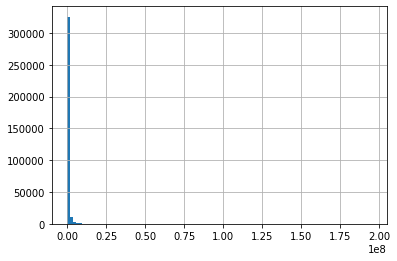

In [710]:
df['target'].hist(bins=100)

Из-за возможных выбросов данные выглядят сильно искаженными.

Чтобы изучить особенность поближе, построим коробчатую диаграмму.

<ipython-input-711-52f9b0632784>:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True);


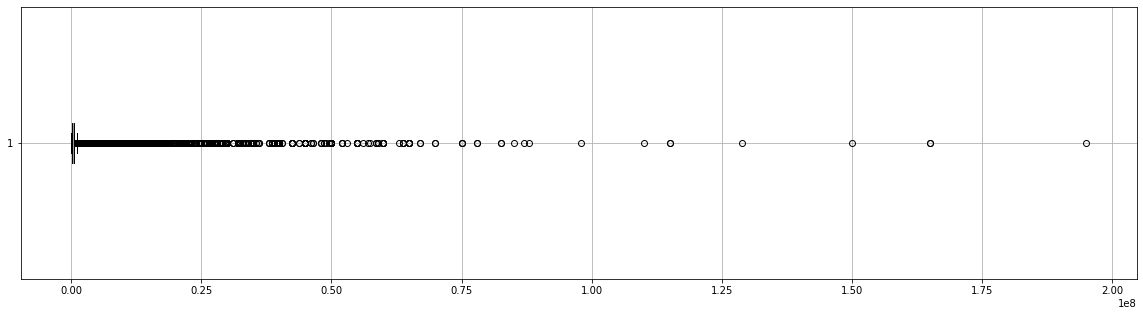

In [711]:
# Посмотрим на коробчатую диаграмму в увеличенном масштабе и поставим сетку
plt.figure(figsize =(20, 5))
plt.boxplot(df['target'], vert=False)
plt.grid(b=True);

По графику предполагаем, что есть выбросы. 

In [712]:
# из сторонних сайтах узнаём, что самая дешевая стоимость недвижимости равна $145 410.
df[df['target']<100000]

,propertyType,baths,city,state,stories,PrivatePool,target,count_beds,sqft_sum
6,unknown,0,Memphis,TN,1.0,0,68000.0,0.0,1773.0
39,unknown,0,other,FL,1.0,0,54000.0,0.0,1773.0
58,unknown,0,Cleveland,TX,1.0,0,50000.0,0.0,1773.0
79,unknown,0,Jacksonville,FL,1.0,0,18000.0,0.0,1773.0
91,condo,2,other,FL,1.0,0,74900.0,2.0,960.0
...,...,...,...,...,...,...,...,...,...
343154,single-family,2,Chicago,IL,1.0,0,49500.0,3.0,1492.0
343166,single-family,0,Indianapolis,IN,1.0,0,50000.0,0.0,1773.0
343168,manufactured,2,Lakeland,FL,1.0,0,24900.0,2.0,960.0
343174,unknown,0,Charlotte,NC,1.0,0,99990.0,0.0,1773.0


In [713]:
# Удалим стоимость недвижимости меньше 100000
df = df[df['target']>100000]

In [714]:
# Из стороннихъ сайтов узнаем, что регион США с самой дорогой жилой недвижимостью: San Francisco, $1,376,514.
df[df['target']>1500000]

,propertyType,baths,city,state,stories,PrivatePool,target,count_beds,sqft_sum
2,single-family,2,Los Angeles,CA,1.0,1,2895000.0,3.0,3000.0
3,single-family,8,Dallas,TX,3.0,0,2395000.0,5.0,6457.0
14,other style,0,Brooklyn,NY,2.0,0,1650000.0,0.0,1773.0
16,townhouse,0,New York,NY,1.0,0,2650000.0,0.0,3325.0
20,single-family,5,other,OR,1.0,0,3500000.0,5.0,5266.0
...,...,...,...,...,...,...,...,...,...
343091,single-family,6,Miami Beach,FL,1.0,1,5500000.0,5.0,3861.0
343112,detached,0,Miami,FL,1.0,0,3450000.0,0.0,4401.0
343136,unknown,0,Brooklyn,NY,3.0,0,2199000.0,0.0,4860.0
343177,single-family,4,Fort Lauderdale,FL,2.0,1,2695000.0,4.0,4214.0


In [715]:
# Удалим значения больше $1500000
df = df[df['target']<1500000]

In [716]:
# df.groupby("sqft_sum")['target'].value_counts(normalize=False)

In [717]:
df['target'].describe()

count    2.892550e+05
mean     4.314811e+05
std      2.874635e+05
min      1.000500e+05
25%      2.299000e+05
50%      3.400000e+05
75%      5.489950e+05
max      1.499999e+06
Name: target, dtype: float64

Для признака target видно, что максимальное значение равно 1.499999e+06, в то время как 75% квартиль равен только 5.489950e+05. А минимальное значение равно 1.000500e+05.  Для наглядности прологарифмируем признак target и посмотрим еще раз на выбросы.

In [718]:
df['target_log'] = np.log(df['target']+1)


<ipython-input-719-bb065de7cacb>:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True);


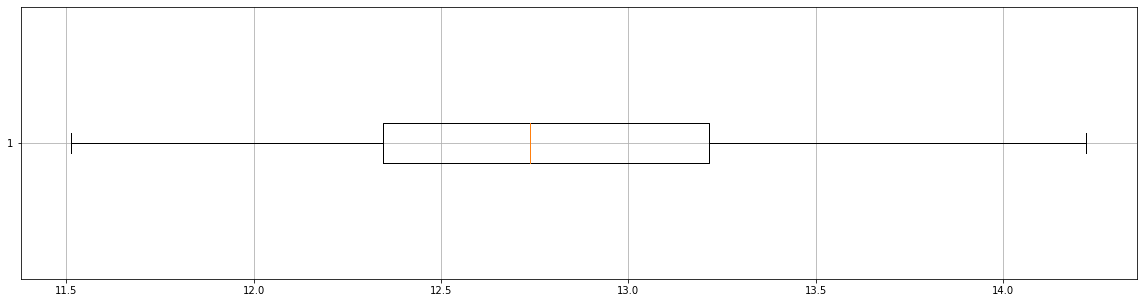

In [719]:
# Посмотрим на коробчатую диаграмму в увеличенном масштабе и поставим сетку
plt.figure(figsize =(20, 5))
plt.boxplot(df['target_log'], vert=False)
plt.grid(b=True);

Построим гистограмму и коробчатую диаграмму стоимости недвижтмости логарифмическом масштабе (target_log). Исходя из визуализации, сделаем предположение, является ли полученное распределение нормальным? Проверим свою гипотезу с помощью теста Д’Агостино при уровне значимости  α=0.05 .


In [720]:
# log_price = np.log(data['target']+1)
# price_data = pd.concat([df['target'],
# log_price.rename('target_log')], axis = 1)
# price_data.describe()

Теперь вместо экстремального разброса значений в 1 и 1.950000e+08 мы получили 0.693147 и
19.08. Таким образом, логарифмическое преобразование сыграло роль в
уменьшении влияния слишком низких и слишком высоких значений.


p_value=0.000
Данные не распределены нормально(отвергаем H0)


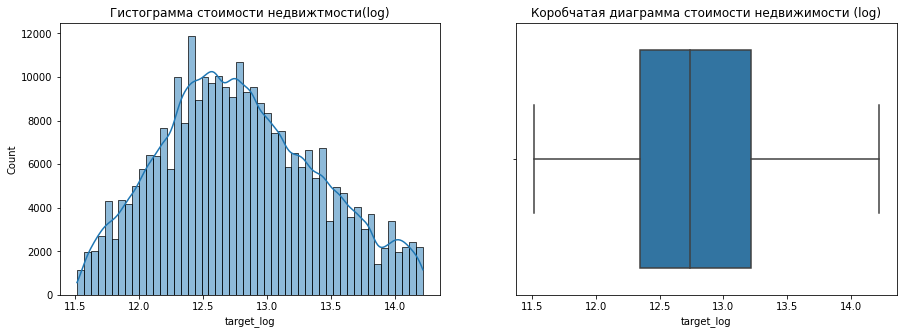

In [721]:
fig, axes = plt.subplots(1,2,figsize=(15, 5))
sns.histplot(data=df,
             x='target_log', # берем столбец target_log для отображения данных
             ax=axes[0],  # помещаем в первый квадрат
             bins=50, # строим 50 блоков
             kde=True,
             palette='bright')
ax=axes[0].set_title('Гистограмма стоимости недвижтмости(log)')

sns.boxplot(
    data=df,
    x='target_log', # берем столбец target_log для отображения данных
    ax=axes[1],  # помещаем во второй квадрат
)
ax=axes[1].set_title('Коробчатая диаграмма стоимости недвижимости (log)')

H0 ='Данные распределены нормально'
H1 ='Данные не распределены нормально(отвергаем H0)'
alpha =0.5
# а) Чему равен вычисленный p-value? Ответ округлите до сотых.
_,p_value = stats.normaltest(df['target_log'])
print('p_value={:.3f}'.format(p_value))

# б) Является ли распределение в логарифмическом масштабе нормальным?
if p_value>alpha/2:
  print(H0)
else:
  print(H1)

### Исследуем на выбросы признак 'baths'


In [722]:
df['baths'].describe()

count    289255.000000
mean         99.699711
std         474.115742
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max        7500.000000
Name: baths, dtype: float64

<AxesSubplot:>

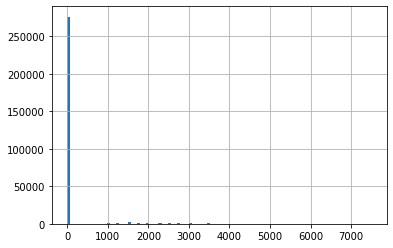

In [723]:
df['baths'].hist(bins=100)

на графике видно, что есть выбросы

<ipython-input-724-297b6422a05b>:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True);


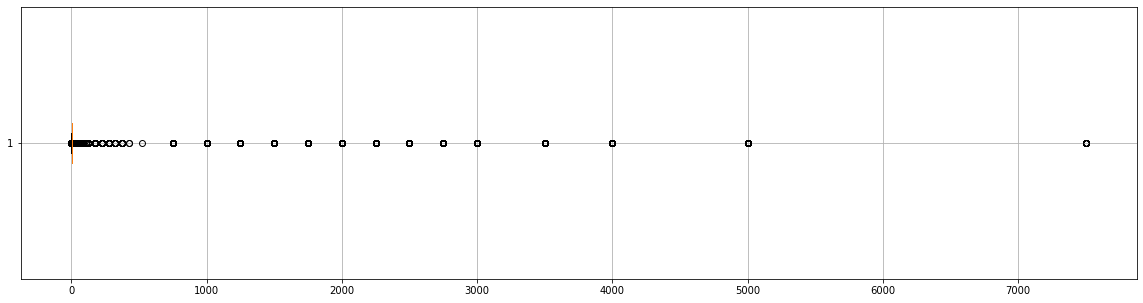

In [724]:
# Посмотрим на коробчатую диаграмму в увеличенном масштабе и поставим сетку
plt.figure(figsize =(20, 5))
plt.boxplot(df['baths'], vert=False)
plt.grid(b=True);

In [725]:
df[df['baths']>100]

,propertyType,baths,city,state,stories,PrivatePool,target,count_beds,sqft_sum,target_log
15,unknown,1750,Fort Lauderdale,FL,1.0,0,335000.0,0.0,2203.0,12.721889
21,penthouse,1000,Miami Beach,FL,2.0,0,579000.0,0.0,1080.0,13.269059
25,unknown,1000,Miami,FL,1.0,0,799000.0,0.0,1773.0,13.591117
106,ranch,2500,San Antonio,TX,1.0,0,199900.0,0.0,1470.0,12.205578
166,traditional,4000,San Antonio,TX,1.0,0,470000.0,0.0,3097.0,13.060490
...,...,...,...,...,...,...,...,...,...,...
342997,unknown,2250,Nashville,TN,1.0,0,419900.0,0.0,2089.0,12.947774
343106,unknown,2000,ORLANDO,FL,2.0,0,210000.0,0.0,1456.0,12.254868
343132,traditional,2750,Houston,TX,1.0,0,185000.0,0.0,1597.0,12.128117
343178,townhouse,2000,Dallas,TX,2.0,0,164500.0,0.0,1709.0,12.010672


In [726]:
ind_baths = df[df['baths']>100].index

In [727]:
ind_baths

Int64Index([    15,     21,     25,    106,    166,    191,    194,    299,
               303,    311,
            ...
            342831, 342842, 342854, 342856, 342969, 342997, 343106, 343132,
            343178, 343179],
           dtype='int64', length=13274)

In [728]:
# заменим аномальные значения в признаке baths на 75 квартиль = 3
df.loc[ind_baths,'baths'] = 3

In [729]:
df['baths'].describe()

count    289255.000000
mean          3.989739
std           7.303964
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          95.000000
Name: baths, dtype: float64

<ipython-input-730-2b5bf3ac2752>:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True);


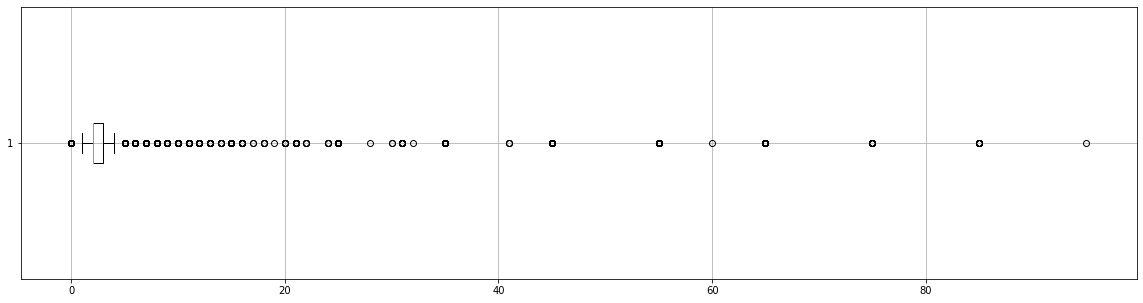

In [730]:
# Посмотрим еще раз на коробчатую диаграмму в увеличенном масштабе и поставим сетку
plt.figure(figsize =(20, 5))
plt.boxplot(df['baths'], vert=False)
plt.grid(b=True);

### Исследуем на выбросы признак 'count_beds'

<AxesSubplot:>

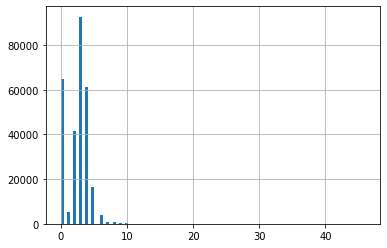

In [731]:
df['count_beds'].hist(bins=100)

In [732]:
df['count_beds'].describe()

count    289255.000000
mean          2.558296
std           1.709843
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          46.000000
Name: count_beds, dtype: float64

In [733]:
df.to_csv('/content/drive/MyDrive/data/df_clear2.csv') # сохраняем очищенный датасет для дальнейшей работы

In [734]:
data = pd.read_csv('/content/drive/MyDrive/data/df_clear2.csv')


In [735]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [736]:
df = data.copy()

## 5. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.

Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;

Надо отобрать признаки, которые мы будем использовать для обучения модели;

Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.

Посмотрим на статистические характеристики

In [737]:
df.describe()

,baths,stories,PrivatePool,target,count_beds,sqft_sum,target_log
count,289255.000000,289255.000000,289255.000000,2.892550e+05,289255.000000,2.892550e+05,289255.000000
mean,3.989739,1.610240,0.122217,4.314811e+05,2.558296,4.979323e+03,12.785162
std,7.303964,1.960637,0.327537,2.874635e+05,1.709843,8.516389e+05,0.607021
min,0.000000,1.000000,0.000000,1.000500e+05,0.000000,1.000000e+00,11.513435
25%,2.000000,1.000000,0.000000,2.299000e+05,2.000000,1.352000e+03,12.345404
50%,2.000000,1.000000,0.000000,3.400000e+05,3.000000,1.795000e+03,12.736704
75%,3.000000,2.000000,0.000000,5.489950e+05,4.000000,2.498000e+03,13.215846
max,95.000000,112.000000,1.000000,1.499999e+06,46.000000,4.566025e+08,14.220976


In [738]:
# кодируем propertyType с помощью  метода LabelEncode

df['propertyType'] = LabelEncoder().fit_transform(df['propertyType'])
df.head(3)

,propertyType,baths,city,state,stories,PrivatePool,target,count_beds,sqft_sum,target_log
0,39,35,other,NC,1.0,0,418000.0,4.0,2900.0,12.943239
1,39,3,other,WA,2.0,0,310000.0,3.0,1947.0,12.644331
2,44,0,Philadelphia,PA,2.0,0,209000.0,2.0,897.0,12.250094


### Закодируем признак 'state' с помощью  метода LabelEncode

In [739]:
df['state'] = df['state'].apply(lambda x: x.upper())
df['state'].unique()

array(['NC', 'WA', 'PA', 'FL', 'OTHER', 'TX', 'NY', 'OR', 'CA', 'NV',
       'TN', 'GA', 'IL', 'MA', 'IN', 'OH', 'UT', 'VT', 'AZ', 'MI', 'DC',
       'CO', 'MD', 'VA', 'MO', 'WI'], dtype=object)

In [740]:
# кодируем штаты с помощью  метода LabelEncode
# from sklearn import preprocessing
# from sklearn.preprocessing import LabelEncoder
df['state'] = LabelEncoder().fit_transform(df['state'])
df.head(3)


,propertyType,baths,city,state,stories,PrivatePool,target,count_beds,sqft_sum,target_log
0,39,35,other,12,1.0,0,418000.0,4.0,2900.0,12.943239
1,39,3,other,24,2.0,0,310000.0,3.0,1947.0,12.644331
2,44,0,Philadelphia,18,2.0,0,209000.0,2.0,897.0,12.250094


### Закодируем признак city с помощью  метода LabelEncode


In [741]:
df['city'] = LabelEncoder().fit_transform(df['city'])
df.head(3)

,propertyType,baths,city,state,stories,PrivatePool,target,count_beds,sqft_sum,target_log
0,39,35,100,12,1.0,0,418000.0,4.0,2900.0,12.943239
1,39,3,100,24,2.0,0,310000.0,3.0,1947.0,12.644331
2,44,0,67,18,2.0,0,209000.0,2.0,897.0,12.250094


###  Оцениваем мультиколинеарность и взаимосвязь с целевым признаком

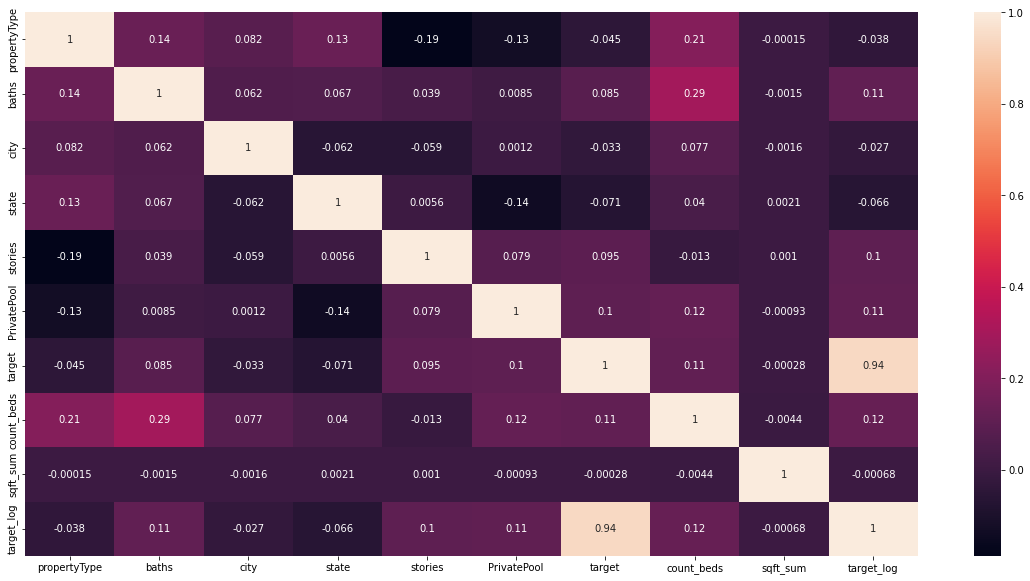

In [742]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True);

Например, в нашем наборе данных мультиколлинеарность
отсутствует, так как она возникает из-за признаков с сильной и очень сильной
корреляцией. По шкале корреляций это от 0.7 и выше; у нас таких значений нет.

Теперь, когда категориальные признаки предобработаны и выбросы удалены, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы  за исключением целевого признака target и его логарифмированной версии target_log:

In [780]:
X = df.drop(['target', 'target_log'], axis=1)
y = df['target']
y_log = df['target_log']

Все наши модели мы будем обучать на логарифмированной версии y_log.

In [744]:
# БЕРЕМ ТЕСТОВЫЕ ДАННЫЕ В ЛОГАРИФМИЧЕСКОМ МАСШТАБЕ и делит на train и test

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=40)

In [745]:
# Нормализуем предикторы в обучающей и тестовой выборках с помощью MinMaxScaler из библиотеки sklearn
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

### Понизим размерность данных (PCA)

In [746]:
# # Теперь понизим размерность данных — возьмём для этого метод главных компонент (PCA) как самый простой и популярный.

# # Найдите минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных.

# from sklearn.decomposition import PCA
# pca = PCA(n_components=0.9, random_state=42).fit(X)
# len(pca.components_)


# # Оставьте только главные компоненты, выделенные в предыдущем задании.
# #  Какую долю дисперсии объясняет первая главная компонента?
# principalComponents = pca.fit_transform(X)
# pca.explained_variance_ratio_[0]

##6. Обучение и сравнение различных моделей

In [747]:
# Построим модель линейной регрессии на обучающей выборке
lr = linear_model.LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)
# Для полученной модели рассчитаем метрику RMSLE на тренировочной и валидационной выборках.
print('Модель линейной регрессии на обучающей выборке (факторы нормализованы, целевая переменная в логарифмическом масштабе):')
print('Train:')
print(round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),3))
print('Test:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),3))

Модель линейной регрессии на обучающей выборке (факторы нормализованы, целевая переменная в логарифмическом масштабе):
Train:
0.593
Test:
0.598


In [748]:
# Построим модель полиномиальной регрессии 2-ой степени 
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_test_scaled_poly = poly.fit_transform(X_test_scaled)


lr = linear_model.LinearRegression()
lr.fit(X_train_scaled_poly, y_train)
y_train_log_pred = lr.predict(X_train_scaled_poly)
y_test_log_pred = lr.predict(X_test_scaled_poly)

print('Модель полиномиальной регрессии 2-ой степени на обучающей выборке:')
print('Train:')
print(round(np.sqrt(metrics.mean_squared_error(y_train, y_train_log_pred)),3))
print('Test:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, y_test_log_pred)),3))

Модель полиномиальной регрессии 2-ой степени на обучающей выборке:
Train:
0.575
Test:
8.687


In [749]:
# Построим модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову)
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_valid_scaled_poly = poly.fit_transform(X_test_scaled)

ridge = linear_model.Ridge(alpha=1)
ridge = ridge.fit(X_train_scaled_poly, y_train)

y_train_log_pred = ridge.predict(X_train_scaled_poly)
y_valid_log_pred = ridge.predict(X_valid_scaled_poly)

print('Train:')
print(round(np.sqrt(metrics.mean_squared_error(y_train, y_train_log_pred)),3))
print('Test:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, y_valid_log_pred)),3))

Train:
0.578
Test:
0.603


In [750]:
# Построим модель дерева решений (DecisionTreeRegressor) на обучающей выборке
dt = tree.DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
y_train_pred = dt.predict(X_train_scaled)
y_test_pred = dt.predict(X_test_scaled)

print("Модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы нормализованы, целевая переменная в логарифмическом масштабе): ")
print('Train:')
print(round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),2))
print('Test:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2))

Модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы нормализованы, целевая переменная в логарифмическом масштабе): 
Train:
0.28
Test:
1.0


In [751]:
# Построим модель случайного леса на обучающей выборке
# n_estimators=200,
# max_depth=12,
# criterion='squared_error',
# min_samples_split=20,
# random_state=42

rf = ensemble.RandomForestRegressor(n_estimators=200,
                                    max_depth=12,
                                    criterion='squared_error',
                                    min_samples_split=20, 
                                    random_state=42,
                                    verbose=True,
                                    n_jobs=-1)
rf.fit(X_train_scaled, y_train)
y_train_log_pred = rf.predict(X_train_scaled)
y_test_log_pred = rf.predict(X_test_scaled)

print('модель случайного леса на обучающей выборке')
print('Train:')
print(round(np.sqrt(metrics.mean_squared_error(y_train, y_train_log_pred)),2))
print('Test:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, y_test_log_pred)),2))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    3.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s


модель случайного леса на обучающей выборке
Train:
0.41
Test:
0.75


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.4s finished


In [752]:
# Модель градиентного бустинга над деревьями решений (GradientBoostingRegressor)
# Гиперпараметры:
learning_rate=0.5,
n_estimators=100,
max_depth=6,
min_samples_split=30,
random_state=42
gb = ensemble.GradientBoostingRegressor(
                                    n_estimators=100,
                                    learning_rate=0.5,
                                    max_depth=6,
                                    min_samples_split=30, 
                                    random_state=42,
                                    verbose=True)
gb.fit(X_train_scaled, y_train)
y_train_log_pred = rf.predict(X_train_scaled)
y_test_log_pred = rf.predict(X_test_scaled)

print('модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке:')
print('Train:')
print(round(np.sqrt(metrics.mean_squared_error(y_train, y_train_log_pred)),2))
print('Test:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, y_test_log_pred)),2))

      Iter       Train Loss   Remaining Time 
         1           0.2774           49.06s
         2           0.2470           48.89s
         3           0.2280           49.11s
         4           0.2137           49.06s
         5           0.2068           48.71s
         6           0.2008           48.01s
         7           0.1945           47.50s
         8           0.1917           46.16s
         9           0.1879           44.09s
        10           0.1856           42.59s
        20           0.1723           32.90s
        30           0.1668           27.28s
        40           0.1628           23.81s
        50           0.1603           19.93s
        60           0.1580           15.52s
        70           0.1561           11.41s
        80           0.1545            7.78s
        90           0.1532            3.86s
       100           0.1519            0.00s


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    3.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    3.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s


модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке:
Train:
0.41
Test:
0.75


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.7s finished


### Посмотрим на результаты:

Линейная регрессия показала наилучший результат


### Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.

In [753]:
selector = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k=8)
selector.fit(X_train, y_train)
best_features = selector.get_feature_names_out()
X_train = X_train[best_features]
X_test = X_test[best_features]
list(best_features)

['propertyType',
 'baths',
 'city',
 'state',
 'stories',
 'PrivatePool',
 'count_beds',
 'sqft_sum']

Text(0.5, 0, 'importances')

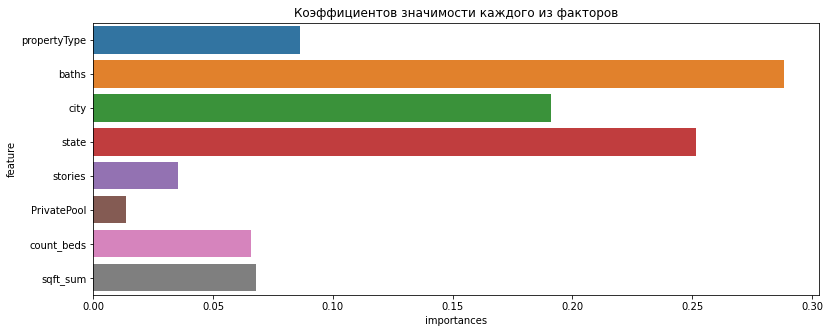

In [754]:
fig, ax = plt.subplots(figsize=(13, 5))
feature = X.columns
feature_importances = gb.feature_importances_
sns.barplot(y=best_features, x=feature_importances, orient='h', ax=ax);
ax.set_title("Коэффициентов значимости каждого из факторов")
ax.set_ylabel("feature")
ax.set_xlabel("importances")

## 7. Прогнозирование для тестового набора данных (результат)

Так как линейная регрессия показала наилучший результат, то выберем ее для прогнозирования

In [755]:
# Построим модель линейной регрессии на обучающей выборке
lr = linear_model.LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)
# Для полученной модели рассчитаем метрику RMSLE на тренировочной и валидационной выборках.
print('Модель линейной регрессии на обучающей выборке (факторы нормализованы, целевая переменная в логарифмическом масштабе):')
print('Train:')
print(round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),3))
print('Test:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),3))

Модель линейной регрессии на обучающей выборке (факторы нормализованы, целевая переменная в логарифмическом масштабе):
Train:
0.593
Test:
0.598


Предсказания из логарифмического масштаба переведем в истинный, используя формулу:
yi=exp(zi)−1

In [756]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(lr.predict(X_test_scaled)) - 1

In [757]:
y_test_predict

array([355984.11094823, 431111.40661229, 525874.76960295, ...,
       349564.39516277, 295464.66536621, 415817.02300638])